In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from statistics import mean
import numpy as np
from matplotlib import style
style.use('default')

In [134]:
pd.set_option('display.max_rows', 20)

In [7]:
strava_source = input()
#/Users/EffiniKaren/Downloads/export_28511039/activities.csv
strava_activities = pd.read_csv(strava_source, parse_dates=['Activity Date'])

In [218]:
old_source = pd.read_excel('Run Analysis.xlsx')
old_run = old_source[['Date','Dist (km)','Time']]
old_run = old_run.dropna(how='all')
old_run['Time'] = pd.to_datetime(old_run["Time"], format='%H:%M:%S')
old_run['Time'] = (old_run['Time'].dt.hour *60*60)+(old_run['Time'].dt.minute * 60)+old_run['Time'].dt.second
old_run = old_run.rename(columns={'Time':'Elapsed Time'})
old_run = old_run.drop([73])
old_run

,Date,Dist (km),Elapsed Time
0,2016-07-16,3.44,2000
1,2016-07-18,2.06,960
2,2016-07-20,2.65,1203
3,2016-07-23,2.95,1425
4,2016-07-24,3.30,1561
...,...,...,...
144,2019-05-13,16.05,7697
145,2019-05-14,5.05,2254
146,2019-05-16,19.06,8458
147,2019-05-21,16.24,7313


In [217]:
strava_run = strava_activities[strava_activities['Activity Type']=='Run']
strava_run = strava_run[['Activity Date','Activity Name','Elapsed Time','Distance']]
strava_run['Time'] = strava_run['Activity Date'].dt.time
strava_run['Date'] = pd.to_datetime(strava_run['Activity Date'].dt.date)
strava_run = strava_run.rename(columns={'Distance':'Dist (km)'})
strava_run.loc[5,'Elapsed Time'] = (36*60)+46
strava_run = strava_run.drop([1,5,21])
strava_run

,Activity Date,Activity Name,Elapsed Time,Dist (km),Time,Date
0,2018-03-11 14:21:30,Afternoon Run,3756,10.00,14:21:30,2018-03-11
2,2018-03-24 13:39:29,Afternoon Run,680,2.02,13:39:29,2018-03-24
3,2018-03-25 09:46:50,Morning Run,4185,9.88,09:46:50,2018-03-25
6,2018-04-24 07:07:43,Morning Run,2175,5.02,07:07:43,2018-04-24
7,2018-04-25 07:19:43,Morning Run,2019,5.01,07:19:43,2018-04-25
...,...,...,...,...,...,...
223,2021-03-06 12:38:05,Lunch Run,774,2.01,12:38:05,2021-03-06
225,2021-03-07 12:33:11,Lunch Run,792,2.05,12:33:11,2021-03-07
227,2021-03-09 19:55:10,New shoe run,819,2.03,19:55:10,2021-03-09
229,2021-03-13 18:27:05,Evening Run,1175,3.01,18:27:05,2021-03-13


In [219]:
all_run = pd.concat([old_run,strava_run])
all_run = all_run.drop_duplicates(subset=['Date','Dist (km)'], keep='first')
all_run['Pace (s)'] = all_run['Elapsed Time'] / all_run['Dist (km)']
all_run['Pace'] = pd.to_datetime(all_run['Pace (s)'], unit='s')
all_run['Pace (hms)'] = pd.to_datetime(all_run['Pace'], unit='s').dt.strftime('%M:%S')
all_run['Elapsed Time (hms)'] = pd.to_datetime(all_run["Elapsed Time"], unit='s').dt.time
all_run['Year'] = all_run["Date"].dt.year
all_run = all_run[all_run['Year']!=2021]
#all_run = all_run.reset_index(drop=True)
all_run


,Date,Dist (km),Elapsed Time,Activity Date,Activity Name,Time,Pace (s),Pace,Pace (hms),Elapsed Time (hms),Year
0,2016-07-16,3.44,2000,NaT,NaN,NaN,581.395349,1970-01-01 00:09:41.395348837,09:41,00:33:20,2016
1,2016-07-18,2.06,960,NaT,NaN,NaN,466.019417,1970-01-01 00:07:46.019417476,07:46,00:16:00,2016
2,2016-07-20,2.65,1203,NaT,NaN,NaN,453.962264,1970-01-01 00:07:33.962264151,07:33,00:20:03,2016
3,2016-07-23,2.95,1425,NaT,NaN,NaN,483.050847,1970-01-01 00:08:03.050847458,08:03,00:23:45,2016
4,2016-07-24,3.30,1561,NaT,NaN,NaN,473.030303,1970-01-01 00:07:53.030303030,07:53,00:26:01,2016
...,...,...,...,...,...,...,...,...,...,...,...
177,2020-10-18,4.06,1815,2020-10-18 15:25:29,Afternoon Run,15:25:29,447.044335,1970-01-01 00:07:27.044334975,07:27,00:30:15,2020
178,2020-11-15,2.52,1202,2020-11-15 10:03:33,Morning Run,10:03:33,476.984127,1970-01-01 00:07:56.984126984,07:56,00:20:02,2020
179,2020-11-16,1.30,542,2020-11-16 14:08:39,Afternoon Run,14:08:39,416.923077,1970-01-01 00:06:56.923076923,06:56,00:09:02,2020
188,2020-12-26,2.80,1453,2020-12-26 13:15:21,Boxing Day ‘Run’ 🎄,13:15:21,518.928571,1970-01-01 00:08:38.928571429,08:38,00:24:13,2020


In [263]:
all_run.sort_values(by='Elapsed Time', ascending=False)

,Date,Dist (km),Elapsed Time,Activity Date,Activity Name,Time,Pace (s),Pace,Pace (hms),Elapsed Time (hms),Year
86,2019-04-23,21.33,10196,2019-04-23 14:26:41,#31,14:26:41,478.012189,1970-01-01 00:07:58.012189405,07:58,02:49:56,2019
139,2019-04-24,21.33,10030,NaT,NaN,NaN,470.229723,1970-01-01 00:07:50.229723394,07:50,02:47:10,2019
104,2019-08-19,21.17,9481,2019-08-19 17:31:39,Evening Run,17:31:39,447.850732,1970-01-01 00:07:27.850732168,07:27,02:38:01,2019
148,2019-05-26,21.19,9480,NaT,NaN,NaN,447.380840,1970-01-01 00:07:27.380840019,07:27,02:38:00,2019
109,2019-09-22,21.01,8814,2019-09-22 10:07:29,Scottish 1/2 Marathon,10:07:29,419.514517,1970-01-01 00:06:59.514516897,06:59,02:26:54,2019
...,...,...,...,...,...,...,...,...,...,...,...
98,2018-08-02,0.80,278,NaT,NaN,NaN,347.500000,1970-01-01 00:05:47.500000000,05:47,00:04:38,2018
32,2018-08-08,0.71,241,2018-08-08 06:52:20,Morning Run,06:52:20,339.436620,1970-01-01 00:05:39.436619718,05:39,00:04:01,2018
101,2018-08-08,0.70,233,NaT,NaN,NaN,332.857143,1970-01-01 00:05:32.857142857,05:32,00:03:53,2018
30,2018-08-03,0.68,222,2018-08-03 07:41:43,Morning Run,07:41:43,326.470588,1970-01-01 00:05:26.470588235,05:26,00:03:42,2018


<ipython-input-462-38d9937646e7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


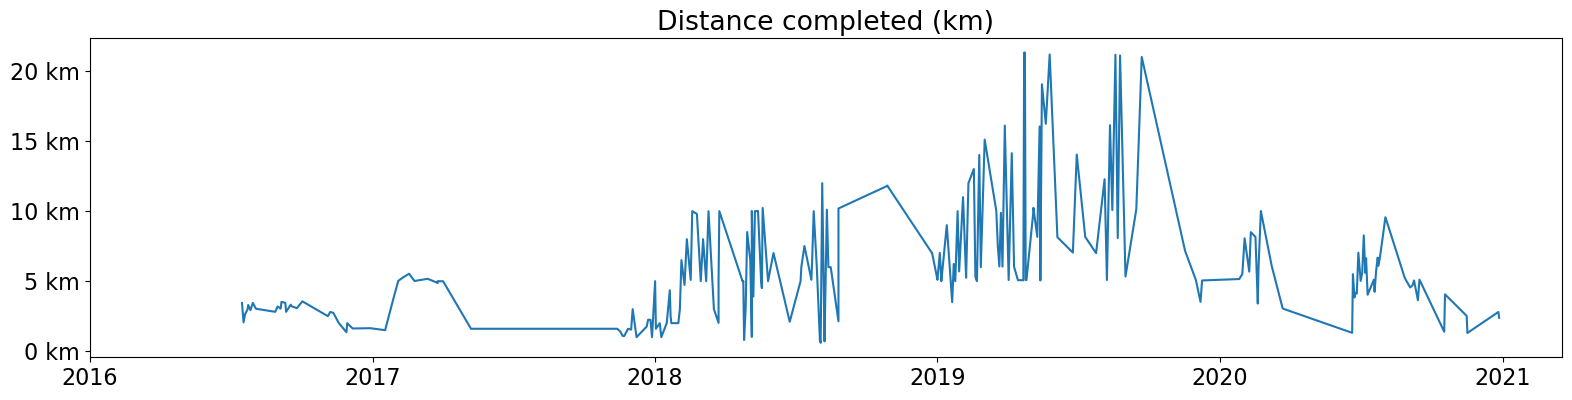

In [462]:
plt.figure(figsize=(16,4))


ax = sns.lineplot(x='Date',y='Dist (km)',data=all_run, estimator=None)
#ylabels = [format_HM(tick) for tick in ax.get_yticks()]
ylabels = [str(int(tick))+' km' for tick in ax.get_yticks()]
ax.set_yticklabels(ylabels) 
#ax.yaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)


major_xticks = [dt.datetime(2016,1,1),dt.datetime(2017,1,1),dt.datetime(2018,1,1),dt.datetime(2019,1,1),dt.datetime(2020,1,1),dt.datetime(2021,1,1)]
ax.set_xticks(major_xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("")
plt.tight_layout()
plt.title('Distance completed (km)')
plt.savefig('yearlytrend.png')

In [322]:
def format_HM(val):
    return str(format(int(val//60),"0>2")) + ':' + str(format(int(val%60), "0>2"))

<ipython-input-449-8b19800fe8b7>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-449-8b19800fe8b7>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


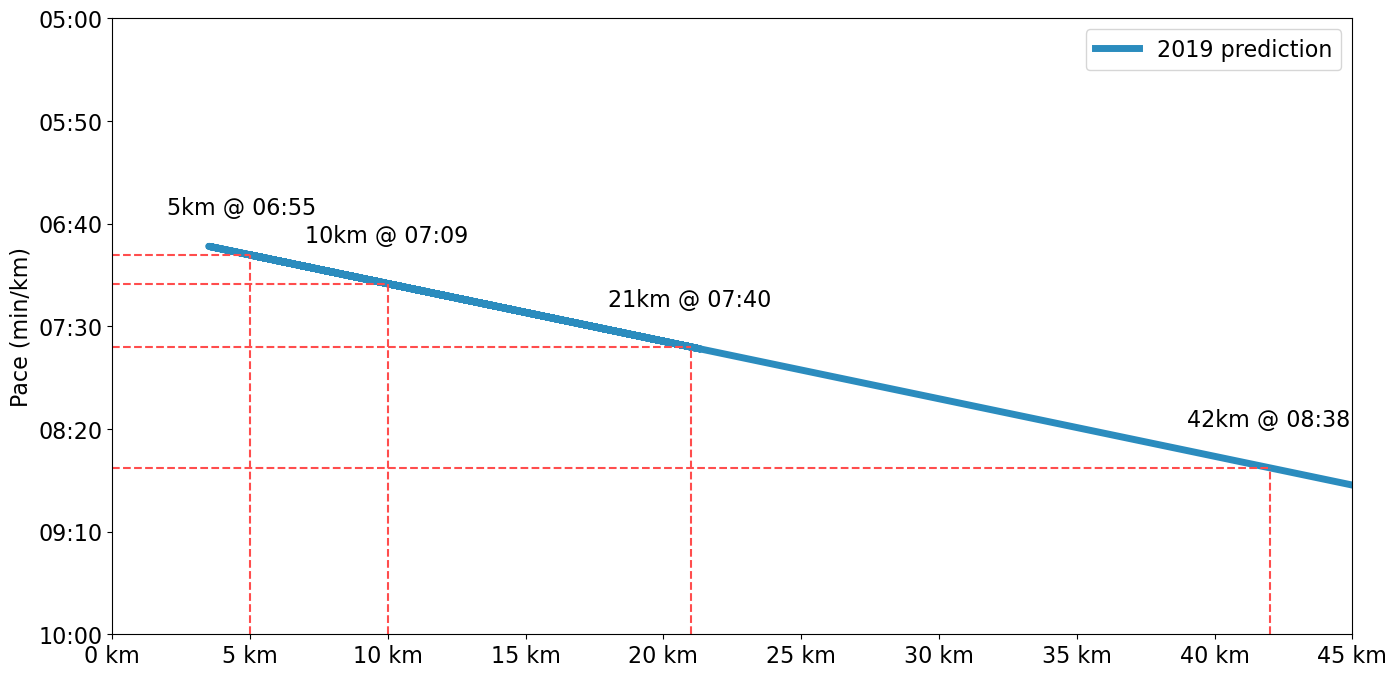

In [449]:



def bf(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b
'''
year_colours = {
    2016:'#fdcc8a',
    2017:'#a1dab4',
    2018:'#41b6c4',
    2019:'#2c7fb8',
    2020:'#253494'
}
'''
year_colours = {
    2016:'#2b8cbe',
    2017:'#2b8cbe',
    2018:'#2b8cbe',
    2019:'#2b8cbe',
    2020:'#2b8cbe'
}
# red = #ff4d4d

plt.figure(figsize=(16,8))
ax = plt.axes()
ax.set_xlim(0, 45)
ax.set_ylim(300, 600)

ax.invert_yaxis()
ylabels = [format_HM(tick) for tick in ax.get_yticks()]
ax.set_yticklabels(ylabels) 

xlabels = [str(int(tick)) + ' km' for tick in ax.get_xticks()]
ax.set_xticklabels(xlabels) 


plt.ylabel('Pace (min/km)', fontsize=16)

# Set general font size
plt.rcParams['font.size'] = '16'

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)


for year in list(set(all_run['Year'])):
    data = all_run[all_run['Year']==year]
    xs = data['Dist (km)']
    ys = data['Pace (s)']

    m, b = bf(xs,ys)
    regression_line = [(m*x)+b for x in xs]
    exs = xs.copy()
    exs[len(xs)] = 45
    extension_line = [(m*x)+b for x in exs]

    
    predict_x = [5,10,21,42]
    

    #plt.scatter(xs,ys,color='#2b8cbe')
    #plt.scatter(xs,ys,color=year_colours[year],label=str(year))
    
    if year == 2019:
        plt.plot(exs, extension_line, color=year_colours[year],linewidth=5,label=str(year)+' prediction')
        for x in predict_x:
            predict_y = (m*x)+b
            x_stop = x/45
            y_stop = 1-((predict_y-300)/300)
            ax.axes.axhline(y=predict_y, xmax=x_stop,color='#ff4d4d',linestyle='--',)
            ax.axes.axvline(x=x, ymax=y_stop,color='#ff4d4d',linestyle='--',)
            plt.text(x-3,predict_y-20,str(x)+'km @ '+str(format_HM(predict_y)))
            #plt.plot(exs, extension_line, color=year_colours[year], linestyle='--')
    plt.legend(loc=1)
    plt.savefig(str(year)+'.png')


plt.show()

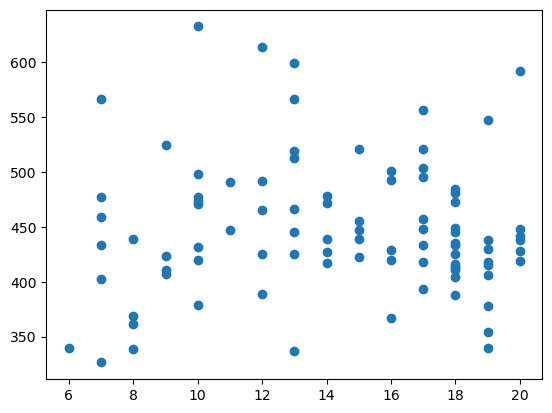

In [265]:
plt.scatter (all_run['Activity Date'].dt.hour,all_run['Pace (s)'])

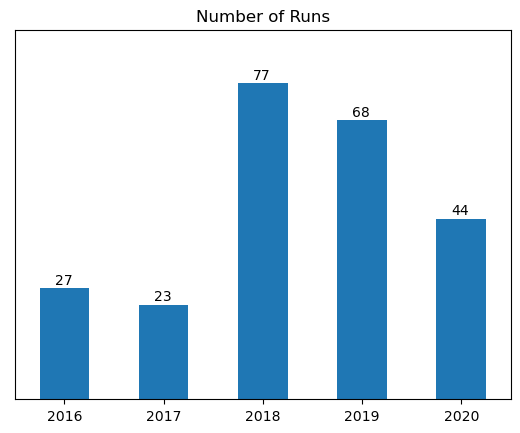

In [315]:
ax = plt.axes()
counts = all_run.groupby('Year')['Year'].count()
counts.plot.bar()
plt.xticks(rotation=0)
ax.xaxis.set_label_text("")
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(0, 90)
plt.title('Number of Runs')

for n,year in enumerate(counts.index):
   ax.text(n - 0.1, counts[year] + 1, str(counts[year])) 

plt.savefig('numberofruns.png')


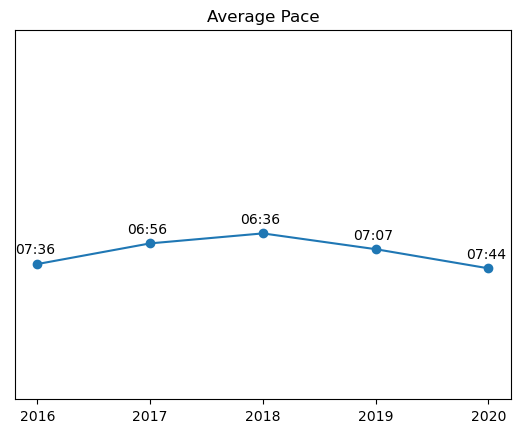

In [350]:
ax = plt.axes()
plt.title('Average Pace')
ax.invert_yaxis()
paces = all_run.groupby('Year')['Pace (s)'].mean()
paces.plot(marker='o')
major_xticks = [2016,2017,2018,2019,2020]
ax.set_xticks(major_xticks)
plt.xticks(rotation=0)
ax.xaxis.set_label_text("")
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(720, 0)

for n,year in enumerate(paces.index):
   ax.text(year - 0.2, paces[year] - 20, format_HM(paces[year])) 

plt.savefig('averagepace.png')


In [297]:
counts.index

Int64Index([2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')